In [1]:
# Install Tensorflow 
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 87.9MB 66kB/s 
     |████████████████████████████████| 3.1MB 37.3MB/s 
     |████████████████████████████████| 501kB 61.1MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1


In [2]:
print(tf.__version__)

2.0.0-beta1


In [0]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distrubted between (-3, +3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

This implements the function y = cos(2x sub1) + cos(3x sub2)

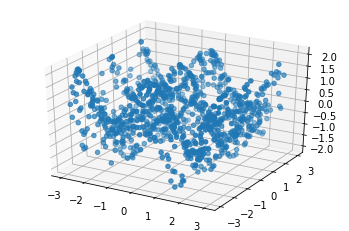

In [5]:
# Plot it 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
# plt.show()

In [0]:
# Build the model
model = tf.keras.models.Sequential([
                                    
                tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
                tf.keras.layers.Dense(1)
])

In [8]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 119us/sample - loss: 0.9643
Epoch 2/100
1000/1000 [==============================] - 0s 35us/sample - loss: 0.9160
Epoch 3/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.9089
Epoch 4/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.8810
Epoch 5/100
1000/1000 [==============================] - 0s 36us/sample - loss: 0.8823
Epoch 6/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.7968
Epoch 7/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.7623
Epoch 8/100
1000/1000 [==============================] - 0s 39us/sample - loss: 0.7105
Epoch 9/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.6529
Epoch 10/100
1000/1000 [==============================] - 0s 39us/sample - loss: 0.5761
Epoch 11/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.5702
Epoch 12/100
1000/

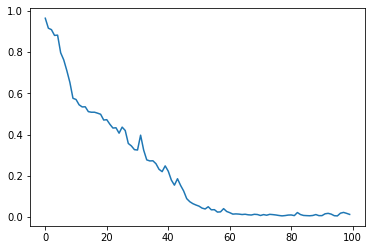

In [10]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

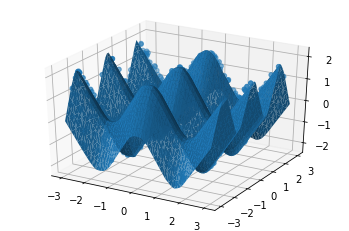

In [14]:
# Plot the pridiction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

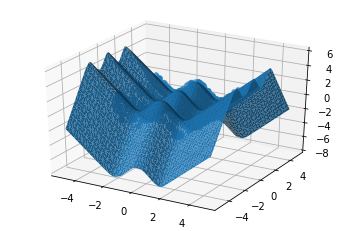

In [16]:
# Can it extraplot?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()